## Financial Data Project
**exploratory data analysis of stock prices

In [103]:
#import libraries
from pandas_datareader import data, wb
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import datetime
import seaborn as sns

import plotly
import cufflinks as cf
cf.go_offline()

%matplotlib inline
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

In [74]:
#import the stock data from Jan 1st 2014 to Jan 1st 2019 for banks:
#B. of American, Citigroup, Goldman, JPMorgan, Morgan Stanley, Wells Fargo
#I also import Petrobras in. 
#google finance has discontinued their API. 
#Hence IEX is used, the data are only available for up to the past 5 years.

start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2019, 1, 1)

#Bank of America
BAC = data.DataReader("BAC", 'iex', start, end)

#Citigroup, Inc.
C = data.DataReader("C", 'iex', start, end)

#Goldman Sachs Group, Inc.
GS = data.DataReader("GS", 'iex', start, end)

#JP Morgan Chase & Co.
JPM = data.DataReader("JPM", 'iex', start, end)

#Morgan Stanley
MS = data.DataReader("MS", 'iex', start, end)

#Wells Fargo & Company
WFC = data.DataReader("WFC", 'iex', start, end)

#Petroleo Brasileiro S.A.
PBR = data.DataReader("PBR", 'iex', start, end)

In [75]:
#or this can be done instead of calling it one by one
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC', 'PBR'], 
                     'iex', start, end)

In [76]:
#create a list of the ticker symbols in alphabetical order and calls it tickers
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC', 'PBR']

In [77]:
#concatenate the bank df together to a single df called company_stocks
company_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC, PBR], axis=1, keys=tickers)
#axis = 1: concat the data along the column because they share the same index

In [78]:
company_stocks.head()

BAC                                              C           \
               open     high      low    close     volume     open     high   
date                                                                          
2014-01-21  15.9438  16.0138  15.7478  15.8785  118388995  49.9750  50.4509   
2014-01-22  15.9438  16.0091  15.8691  16.0091   68231534  49.5086  49.6180   
2014-01-23  15.9345  15.9531  15.6264  15.7384  124037063  49.1659  49.1659   
2014-01-24  15.5611  15.6077  15.3557  15.3557  114269725  47.6428  47.7570   
2014-01-27  15.2810  15.4397  14.9917  15.2250  135060624  46.7385  47.2716   

                                          ...         WFC                    \
                low    close    volume    ...        open     high      low   
date                                      ...                                 
2014-01-21  49.0802  49.3562  27577062    ...     40.3325  40.6168  40.0992   
2014-01-22  49.0327  49.4038  20851684    ...     40.5319  40.6100  40.3238   
2014-01-23  48.1188  48.2806  34854131    ...     40.2371  40.2805  39.8902   
2014-01-24  46.7195  46.9574  59204796    ...     39.9249  40.0290  39.4393   
2014-01-27  46.0341  46.4625  39704016    ...     39.4827  39.7862  39.2225   

                                   PBR                                       
              close    volume     open     high      low    close    volume  
date                                                                         
2014-01-21  40.3238  15534175  11.8904  11.9289  11.6497  11.7844  22835580  
2014-01-22  40.4712  11817453  11.8518  12.0829  11.8422  12.0348  12445905  
2014-01-23  40.1937  19832320  12.0444  12.0540  11.6015  11.7074  18668209  
2014-01-24  39.4393  20323164  11.5245  11.5438  11.1683  11.3223  25114096  
2014-01-27  39.4827  21418026  11.2549  11.3897  11.0720  11.3608  22334841  

[5 rows x 35 columns]

In [79]:
#set the column name levels
company_stocks.columns.names = ['Ticker', 'Stock Info']

In [80]:
company_stocks.head()

Ticker          BAC                                              C           \
Stock Info     open     high      low    close     volume     open     high   
date                                                                          
2014-01-21  15.9438  16.0138  15.7478  15.8785  118388995  49.9750  50.4509   
2014-01-22  15.9438  16.0091  15.8691  16.0091   68231534  49.5086  49.6180   
2014-01-23  15.9345  15.9531  15.6264  15.7384  124037063  49.1659  49.1659   
2014-01-24  15.5611  15.6077  15.3557  15.3557  114269725  47.6428  47.7570   
2014-01-27  15.2810  15.4397  14.9917  15.2250  135060624  46.7385  47.2716   

Ticker                                    ...         WFC                    \
Stock Info      low    close    volume    ...        open     high      low   
date                                      ...                                 
2014-01-21  49.0802  49.3562  27577062    ...     40.3325  40.6168  40.0992   
2014-01-22  49.0327  49.4038  20851684    ...     40.5319  40.6100  40.3238   
2014-01-23  48.1188  48.2806  34854131    ...     40.2371  40.2805  39.8902   
2014-01-24  46.7195  46.9574  59204796    ...     39.9249  40.0290  39.4393   
2014-01-27  46.0341  46.4625  39704016    ...     39.4827  39.7862  39.2225   

Ticker                             PBR                                       
Stock Info    close    volume     open     high      low    close    volume  
date                                                                         
2014-01-21  40.3238  15534175  11.8904  11.9289  11.6497  11.7844  22835580  
2014-01-22  40.4712  11817453  11.8518  12.0829  11.8422  12.0348  12445905  
2014-01-23  40.1937  19832320  12.0444  12.0540  11.6015  11.7074  18668209  
2014-01-24  39.4393  20323164  11.5245  11.5438  11.1683  11.3223  25114096  
2014-01-27  39.4827  21418026  11.2549  11.3897  11.0720  11.3608  22334841  

[5 rows x 35 columns]

In [81]:
#using .xs to grab data inside multilevel index
#the max close price for each company's stock throughout the time period
company_stocks.xs(key='close', axis=1, level='Stock Info').max()
#axis=1: to tell it to grap data from column
#level: to tell it to get it from stock info. That's why set column name

Ticker
BAC     32.3681
C       78.3443
GS     270.4223
JPM    116.8560
MS      57.8855
WFC     64.0585
PBR     20.4563
dtype: float64

In [82]:
#or using a loop
for tick in tickers:
    print(tick, company_stocks[tick]['close'].max())

BAC 32.3681
C 78.3443
GS 270.4223
JPM 116.856
MS 57.8855
WFC 64.0585
PBR 20.4563


In [83]:
#create a new empty df called returns.
#return is defined by r_t = (p_t/(p_t-1)) - 1
returns = pd.DataFrame()

In [84]:
#create a loop to calculate and return to return****
for tick in tickers:
    returns[tick+ ' Return'] = company_stocks[tick]['close'].pct_change()
#tick+: function tick concatenate with Return (for column names)
#pct_change to calculate return.
    
returns.head()

BAC Return  C Return  GS Return  JPM Return  MS Return  \
date                                                                 
2014-01-21         NaN       NaN        NaN         NaN        NaN   
2014-01-22    0.008225  0.000964   0.002771   -0.009972  -0.010420   
2014-01-23   -0.016909 -0.022735  -0.016870   -0.019447  -0.025086   
2014-01-24   -0.024316 -0.027406  -0.018213   -0.024437  -0.032719   
2014-01-27   -0.008511 -0.010539  -0.017598    0.000000  -0.015763   

            WFC Return  PBR Return  
date                                
2014-01-21         NaN         NaN  
2014-01-22    0.003655    0.021248  
2014-01-23   -0.006857   -0.027204  
2014-01-24   -0.018769   -0.032894  
2014-01-27    0.001100    0.003400

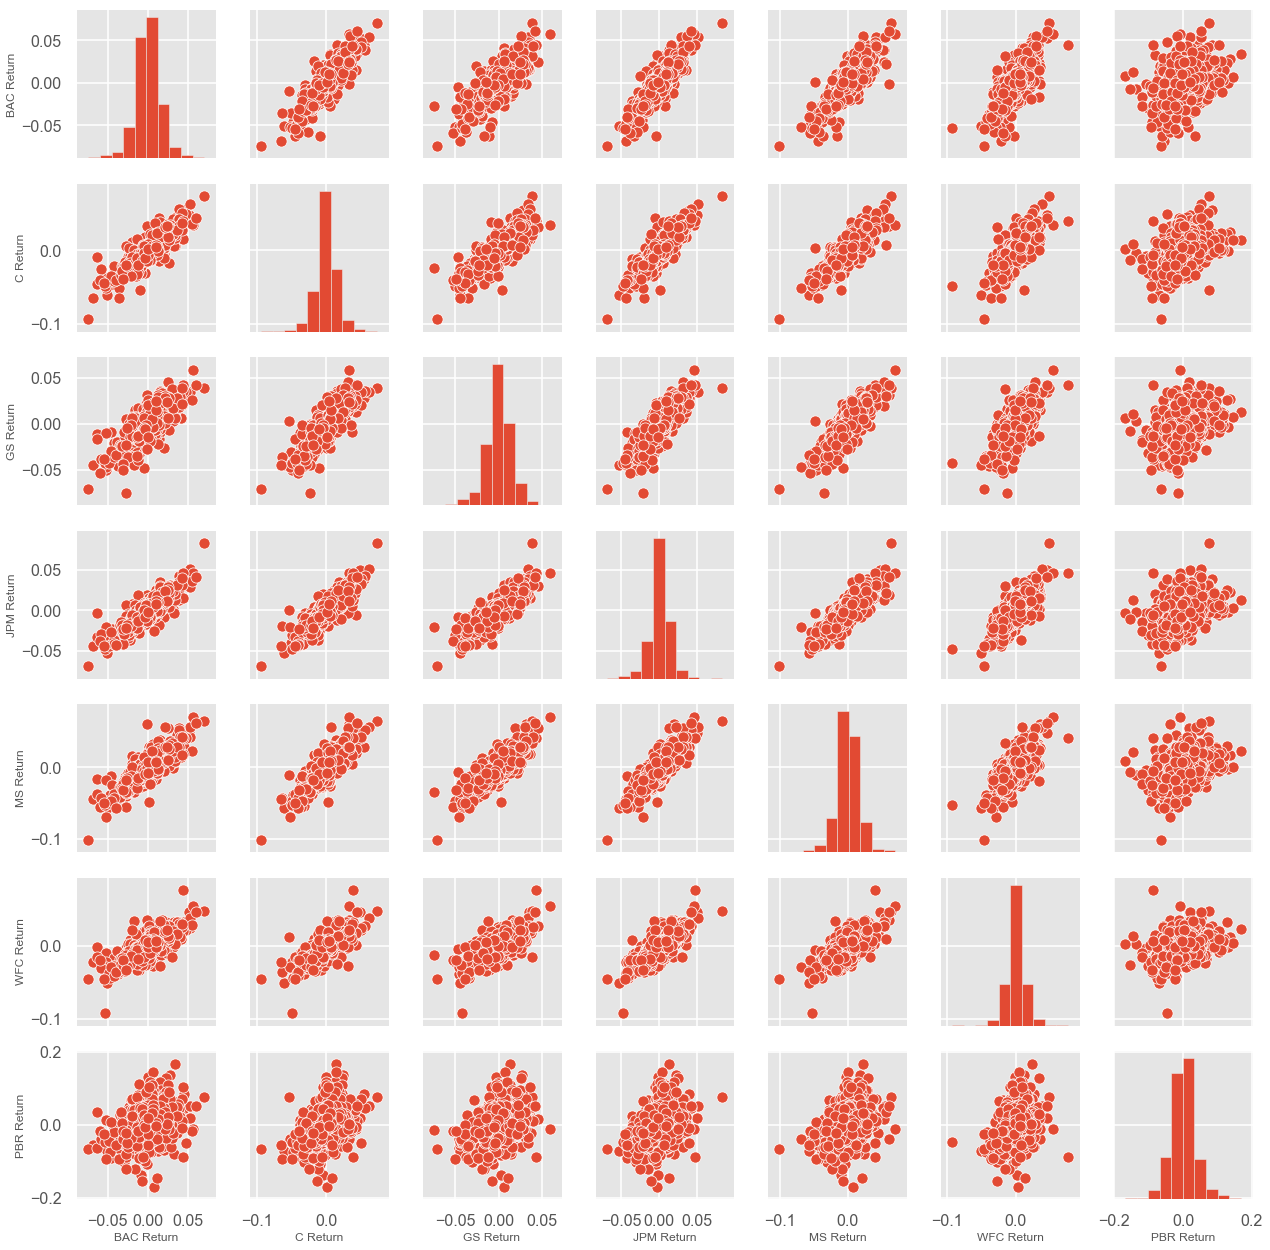

In [85]:
#create a pairplot
sns.pairplot(returns[1:]) #start ploting from the second row

In [86]:
#The plot looks normal and they have some correlation 
#except PBR which I suspect is due to the recent scandal.
#However, the example used was focusing from 2006 to 2016. 
#Citigroup has abnormal plot: an almost straight line bundle
#due to a huge stock crash in 2008 and the bank was insolvent. 
#link: en.wikipedia.org/wiki/Citigroup#Collapse_&_US_Government_Intervention_(2008)

In [87]:
#the dates which each company stock had the best and worst in single day return

#returns['BAC Return'].argmin() #argmin returns timestamp

returns.idxmin() #or use this idx to grap min across the entire df.

BAC Return    2016-06-24
C Return      2016-06-24
GS Return     2018-11-12
JPM Return    2016-06-24
MS Return     2016-06-24
WFC Return    2018-02-05
PBR Return    2017-05-18
dtype: object

In [88]:
#on 18.05.2018, PBR shares dropped almost 20%. 
#A day before, Globol released report about Michel Temer was secretly recorded
#discussing hush money pay-offs to a jailed associate. 

#https://www.fool.com/investing/2017/05/18/heres-why-petrobras-shares-dropped-as-much-as-198.aspx
#https://www.theguardian.com/world/2017/may/18/brazil-explosive-recordings-implicate-president-michel-temer-in-bribery
#https://oglobo.globo.com/brasil/dono-da-jbs-grava-temer-dando-aval-para-compra-de-silencio-de-cunha-21353935

In [89]:
#on 24.06.2016, banks' shares dropped after UK voted to leave the EU.
#on 12.11.2018, Goldman Sachs slump the most in 7 years due to fallout from 1MDB scandal.
#on 05.02.2018, Federal Reserve restrict growth at Wells Fargo by assets until its risk and governance is improved.

In [90]:
#and vice versa
returns.idxmax()

BAC Return    2016-02-12
C Return      2016-02-12
GS Return     2016-11-09
JPM Return    2016-02-12
MS Return     2016-11-09
WFC Return    2016-11-10
PBR Return    2016-02-22
dtype: object

In [91]:
#sd of the returns
#sometimes the basic measurement of the riskiness of a stock is it's sd of the return.
#high sd means the stock prices go up and down a lot.
#small sd means the prices are steady
returns.std()
#just based on std, PBR stock is the riskiest. 
#However, it is very small compared to citigroup in 2008.

BAC Return    0.016043
C Return      0.015158
GS Return     0.014342
JPM Return    0.013140
MS Return     0.016352
WFC Return    0.012750
PBR Return    0.036423
dtype: float64

In [92]:
#riskiest stock in 2017
returns.ix['2017-01-01':'2017-12-31'].std()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



BAC Return    0.013713
C Return      0.011077
GS Return     0.012405
JPM Return    0.010229
MS Return     0.013134
WFC Return    0.011194
PBR Return    0.024061
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



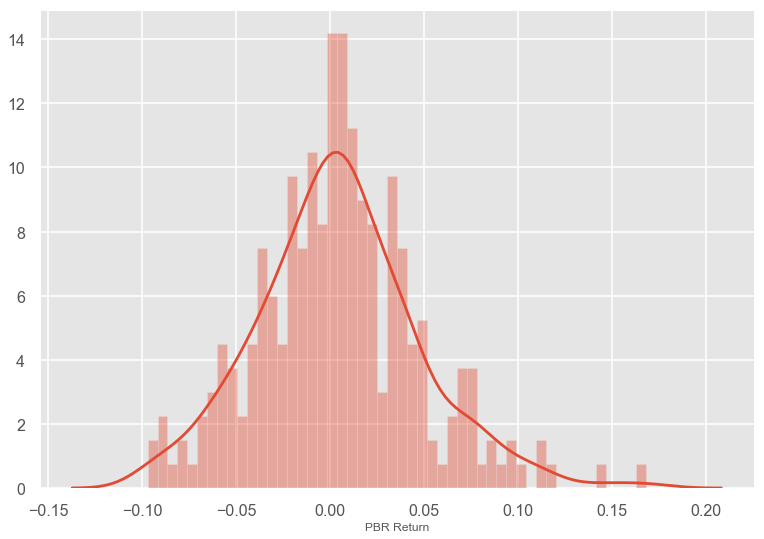

In [93]:
#create a distplot of 2016 returns for PBR
sns.distplot(returns.ix['2016-01-01':'2017-01-01']['PBR Return'],
             bins=50)

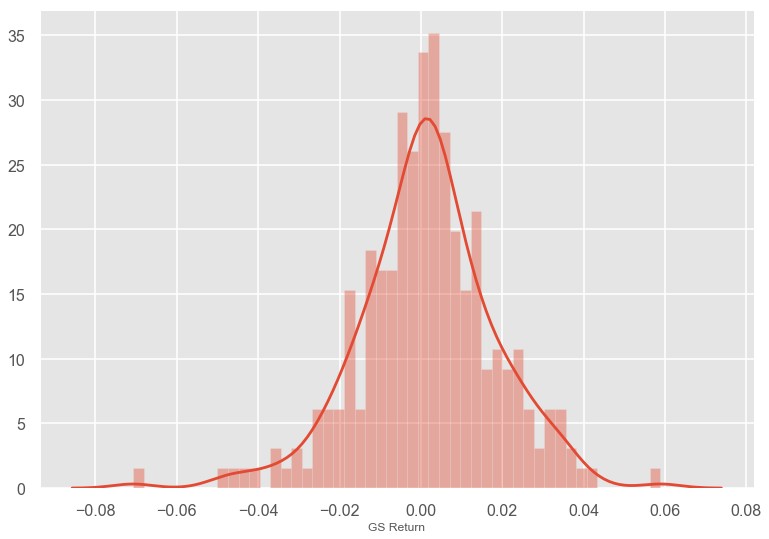

In [94]:
#create a distplot of 2016 returns for JPM
sns.distplot(returns.loc['2016-01-01':'2017-01-01']['GS Return'],
             bins=50)

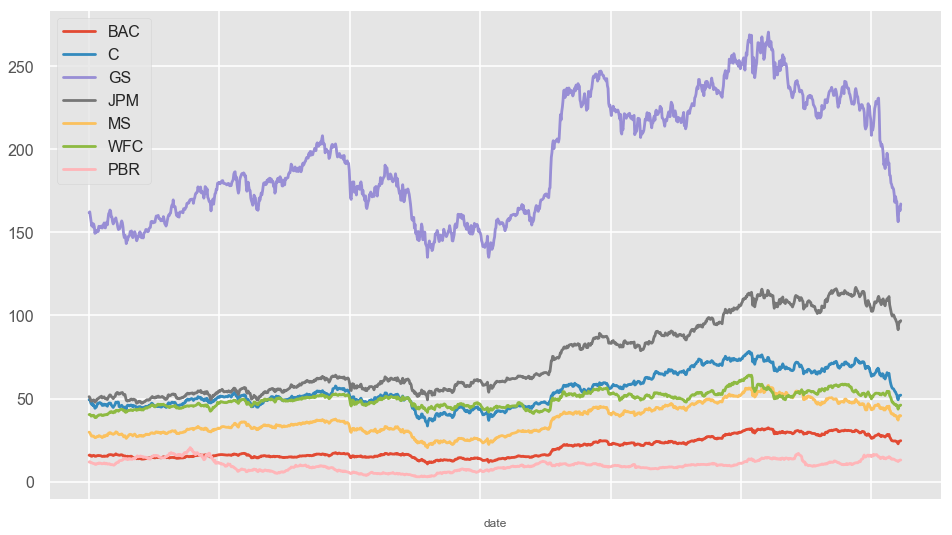

In [95]:
#create a line plot showing close price for each company
for tick in tickers:
    company_stocks[tick]['close'].plot(label=tick, figsize=(16,9))
plt.legend()

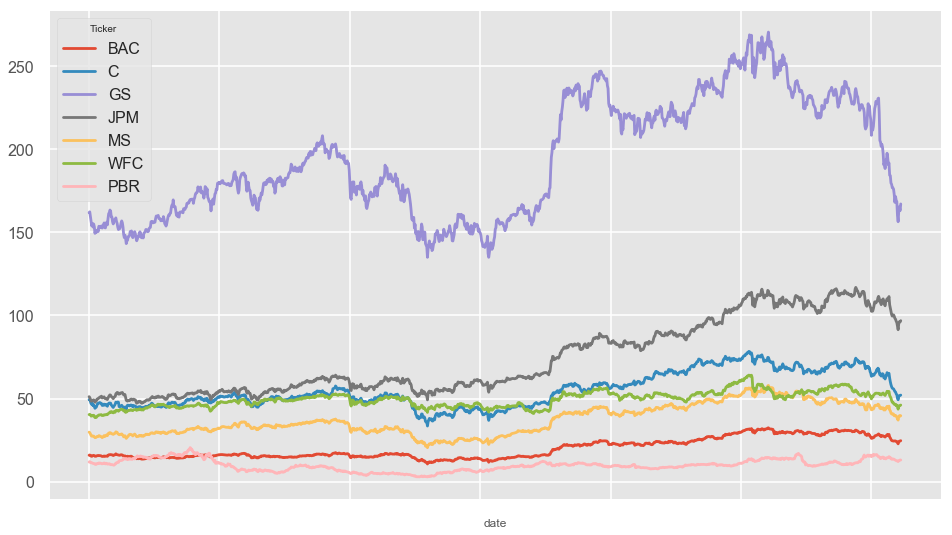

In [96]:
#or
company_stocks.xs(key='close', axis=1, level='Stock Info').plot(figsize=(16,9))

In [97]:
#using plotly
company_stocks.xs(key='close', axis=1, level='Stock Info').iplot(colorscale='Dark2')

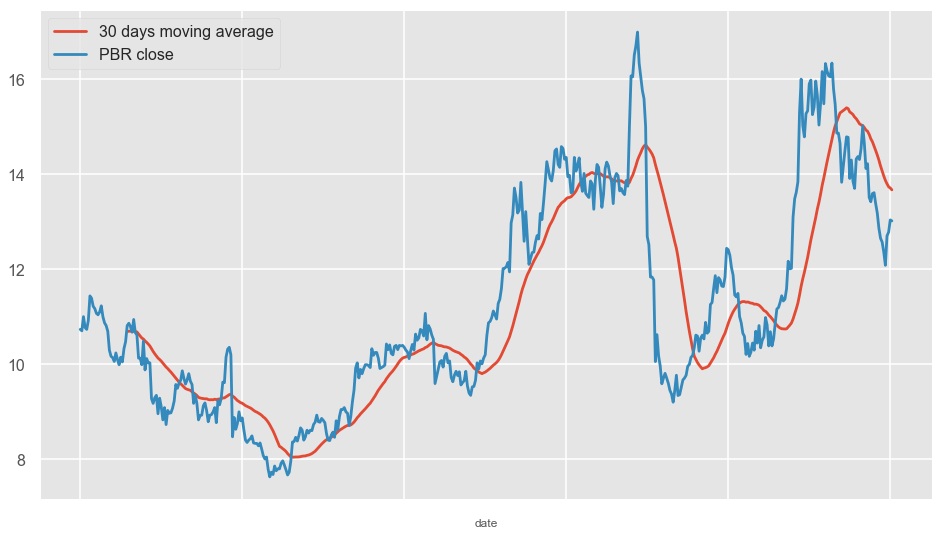

In [148]:
#moving average against close price for PBR in year 2017-18 for 30 days interval
fig = plt.figure(figsize=(16,9))
PBR['close'].loc['2017-01-01':'2018-12-31'].rolling(window=30).mean().plot(label='30 days moving average')
PBR['close'].loc['2017-01-01':'2018-12-31'].plot(label='PBR close')
plt.legend()


In [143]:
#or much simpler method
PBR['close'].loc['2017-01-01':'2018-12-31'].ta_plot(study='sma')

In [129]:
#create heatmap between the stocks close price
close_corr = company_stocks.xs(key='close', axis=1, level='Stock Info').corr()
sns.heatmap(close_corr, annot=True)

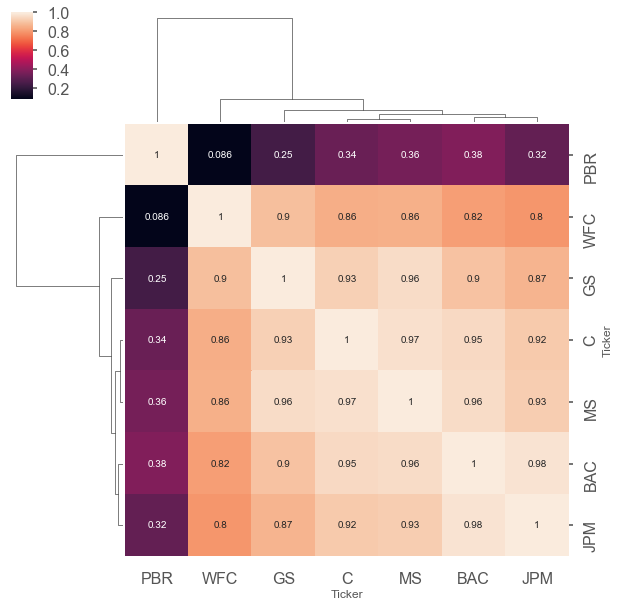

In [130]:
#create clustermap
sns.clustermap(close_corr, annot=True)

In [136]:
#create a candle plot of PBR's stock from 2017 to 18
PBR[['open', 'high', 'low', 'close']].loc['2017-01-01':'2018-12-31'].iplot(kind='candle')
#candle plot: red = decrease, green = increase

In [144]:
#create a simple moving average plot of GS for year 2018
GS['close'].loc['2018-01-01':'2018-12-31'].ta_plot(study='sma')

In [146]:
#create a ballinger band plot of GS for year 2018
GS['close'].loc['2018-01-01':'2018-12-31'].ta_plot(study='boll')

In [147]:
#create a ballinger band plot of PBR for year 2018
PBR['close'].loc['2017-01-01':'2018-12-31'].ta_plot(study='boll')